# `Logistic Regression Assignment -----------------------------------`

In [592]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [593]:
data = pd.read_csv('heart.csv',sep='\t')   # here separator is \t
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,True,Normal,150,No,2.3,Up_Sloping,0,1,Yes
1,37,Male,non-anginal pain,130,250,False,Not_Normal,187,No,3.5,Up_Sloping,0,2,Yes
2,41,Female,atypical angina,130,204,False,Normal,172,No,1.4,Down_Sloping,0,2,Yes
3,56,Male,atypical angina,120,236,False,Not_Normal,178,No,0.8,Down_Sloping,0,2,Yes
4,57,Female,typical angina,120,354,False,Not_Normal,163,Yes,0.6,Down_Sloping,0,2,Yes


In [594]:
data.shape

(303, 14)

In [595]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [596]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal          int64
target       object
dtype: object

In [597]:
data['fbs'] = data['fbs'].astype('object')

In [598]:
data.isnull().sum()   # bam!! we are lucky

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [599]:
target = 'target'
cont_columns = data.select_dtypes(['int64','float64']).columns
cat_columns = list(filter(lambda x: x!='target',data.select_dtypes('object').columns))

In [600]:
cont_columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

In [601]:
cat_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

### Variables
#### Cat
- sex
- cp
- restecg      
- exang   
- slope   
- target

#### Num
- age
- trestbps      
- thalach
- oldpeak     
- ca            
- thal

## `Univariate Analysis`
### `Categorical Columns`
### sex

In [602]:
data['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

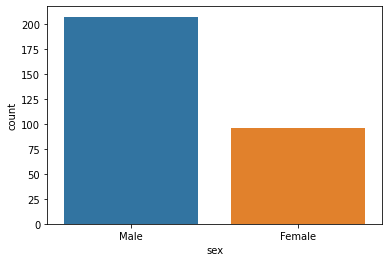

In [603]:
sns.countplot(data['sex'])

### cp

In [604]:
data['cp'].value_counts()

 typical angina      143
 non-anginal pain     87
atypical angina       50
asymptomatic          23
Name: cp, dtype: int64

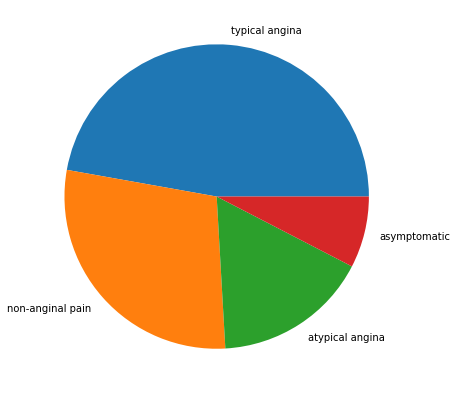

In [605]:
plt.figure(figsize=(10,7))
plt.pie(data['cp'].value_counts(),labels=['typical angina','non-anginal pain','atypical angina','asymptomatic']);

### restecg

In [606]:
data['restecg'].value_counts()

Not_Normal    154
Normal        147
2               2
Name: restecg, dtype: int64

### drop unnecessary entry

In [607]:
data[data['restecg'] == '2']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,55,Female,typical angina,128,205,False,2,130,Yes,2.0,Flat,1,3,No
291,58,Male,typical angina,114,318,False,2,140,No,4.4,Up_Sloping,3,1,No


In [608]:
data.drop(data[data['restecg'] == '2'].index, inplace = True)

In [609]:
data['restecg'].value_counts()

Not_Normal    154
Normal        147
Name: restecg, dtype: int64

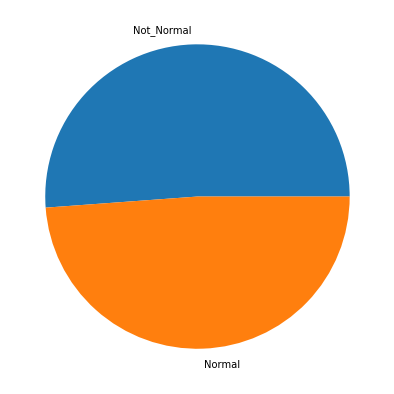

In [610]:
plt.figure(figsize=(10,7))
plt.pie(data['restecg'].value_counts(),labels=['Not_Normal','Normal']);

### exang

In [611]:
data['exang'].value_counts()

No     203
Yes     98
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

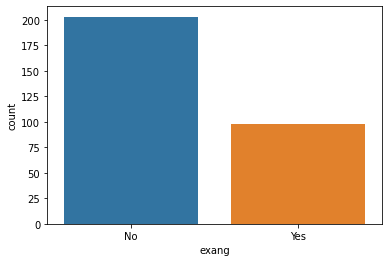

In [612]:
sns.countplot(data['exang'])

### slope

In [613]:
data['slope'].value_counts()

Down_Sloping    142
Flat            139
Up_Sloping       20
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

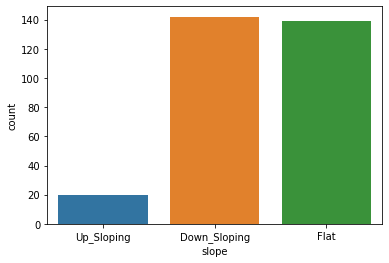

In [614]:
sns.countplot(data['slope'])

### target

In [615]:
data['target'].value_counts()

Yes    165
No     136
Name: target, dtype: int64

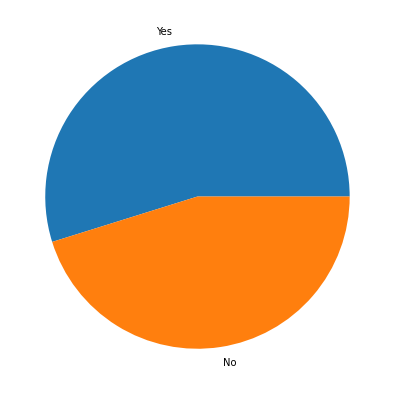

In [616]:
plt.figure(figsize=(10,7))
plt.pie(data['target'].value_counts(),labels=['Yes','No']);

### `Numerical Columns`

In [617]:
cont_columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

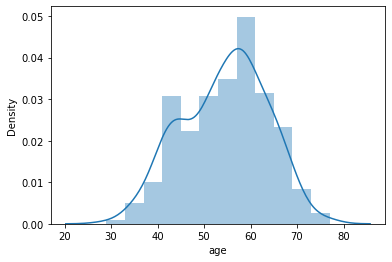

In [618]:
sns.distplot(data['age'])

### trestbps

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

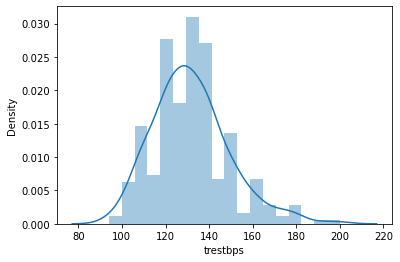

In [619]:
sns.distplot(data['trestbps'])

<AxesSubplot:xlabel='trestbps'>

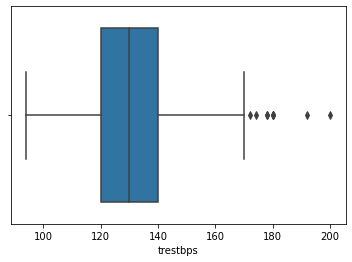

In [620]:
sns.boxplot(data['trestbps'])

In [621]:
q1=np.percentile(data['trestbps'],25)
q3=np.percentile(data['trestbps'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
data = data[data['trestbps'] <= upper_bound]   # remove outliers

<AxesSubplot:xlabel='trestbps'>

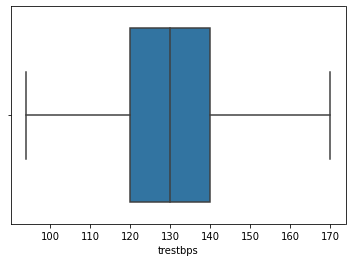

In [622]:
sns.boxplot(data['trestbps'])

### chol

<AxesSubplot:xlabel='chol', ylabel='Density'>

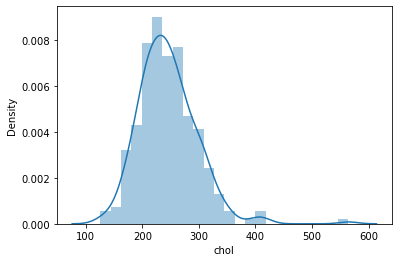

In [623]:
sns.distplot(data['chol'])

### log transformation to remove skewness

In [624]:
data['chol'] = np.log(data['chol'])

<AxesSubplot:xlabel='chol', ylabel='Density'>

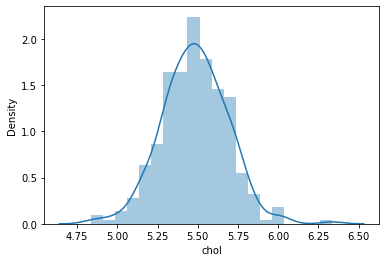

In [625]:
sns.distplot(data['chol'])

<AxesSubplot:xlabel='chol'>

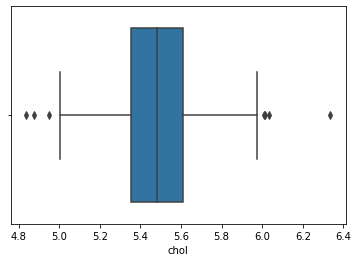

In [626]:
sns.boxplot(data['chol'])

In [627]:
q1=np.percentile(data['chol'],25)
q3=np.percentile(data['chol'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
data = data[data['chol'] <= upper_bound]   # remove outliers

<AxesSubplot:xlabel='chol'>

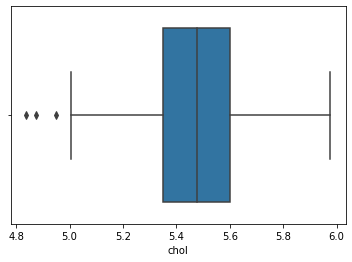

In [628]:
sns.boxplot(data['chol'])

### thalach

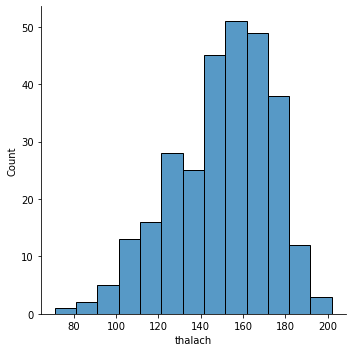

In [629]:
sns.displot(data['thalach'])

In [630]:
data['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 174, 160, 139, 171, 144,
       162, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105, 181,
       116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 145, 136,
        97, 127, 103, 124,  88, 106,  95,  71, 118, 134,  90], dtype=int64)

<AxesSubplot:xlabel='thalach'>

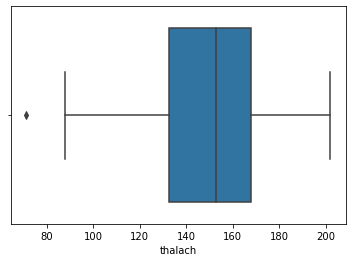

In [631]:
sns.boxplot(data['thalach'])

### oldpeak

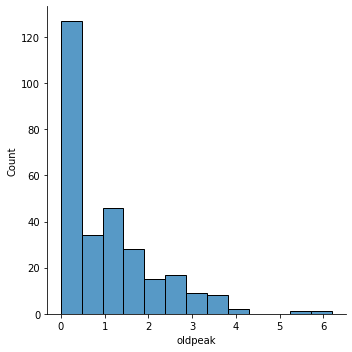

In [632]:
sns.displot(data['oldpeak'])

<AxesSubplot:xlabel='oldpeak'>

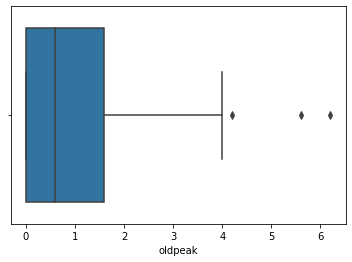

In [633]:
sns.boxplot(data['oldpeak'])

In [634]:
q1=np.percentile(data['oldpeak'],25)
q3=np.percentile(data['oldpeak'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
data = data[data['oldpeak'] <= upper_bound]   # remove outliers

<AxesSubplot:xlabel='oldpeak'>

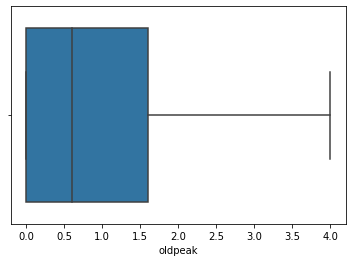

In [635]:
sns.boxplot(data['oldpeak'])

### ca

In [636]:
data['ca'].value_counts()

0    167
1     62
2     35
3     16
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

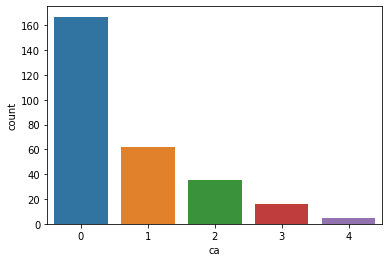

In [637]:
sns.countplot(data['ca'])

### thal

In [638]:
data['thal'].value_counts()

2    162
3    104
1     17
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

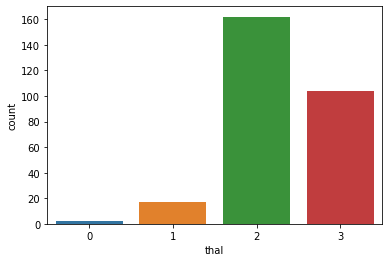

In [639]:
sns.countplot(data['thal'])

## `Bivariate Analysis`

### Variables
#### Cat
- sex
- cp
- restecg      
- exang   
- slope   
- target

#### Num
- age
- trestbps      
- thalach
- oldpeak    
- chol
- ca            
- thal

### `chi square test ------------------------------------`

In [640]:
from scipy.stats import chi2_contingency

def chisq_test(target,independent_col,data):
    two_way = pd.crosstab(data[target],data[independent_col])
    chi_test_result = chi2_contingency(two_way)
    print(f'{independent_col} vs Target => chi-square result p-values => {chi_test_result[1]}')

In [641]:
for col in cat_columns:
    chisq_test(target,col,data)

sex vs Target => chi-square result p-values => 5.881853769927381e-08
cp vs Target => chi-square result p-values => 6.022717314943197e-16
fbs vs Target => chi-square result p-values => 0.7424618563341592
restecg vs Target => chi-square result p-values => 0.004235016038493326
exang vs Target => chi-square result p-values => 1.497822505886287e-12
slope vs Target => chi-square result p-values => 1.1418552138020461e-09


#### `All categorical variables except fbs are related to Target`

### `T test --------------------------------------------`

In [642]:
from scipy.stats import ttest_ind

for i in cont_columns:
    target_yes = data.loc[data['target']=='Yes',i]
    target_no = data.loc[data['target']=='No',i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs Target => {ttest_results}')

age vs Target => Ttest_indResult(statistic=-3.929573408022749, pvalue=0.00010702385147575101)
trestbps vs Target => Ttest_indResult(statistic=-1.849987304875851, pvalue=0.06535771203937871)
chol vs Target => Ttest_indResult(statistic=-1.6612259479275326, pvalue=0.09777545108028551)
thalach vs Target => Ttest_indResult(statistic=7.9343229036908705, pvalue=4.964057904994313e-14)
oldpeak vs Target => Ttest_indResult(statistic=-8.041071392607211, pvalue=2.4495538503010074e-14)
ca vs Target => Ttest_indResult(statistic=-6.833042423080703, pvalue=5.0937205612925185e-11)
thal vs Target => Ttest_indResult(statistic=-6.1848962725357906, pvalue=2.167915844059003e-09)


#### `All numerical variables except chol are related to Target`

### `Label Encoding`

In [643]:
from sklearn.preprocessing import LabelEncoder

binary = ['sex','restecg','exang','target']
le = LabelEncoder()
for i in binary:
    data[i] = le.fit_transform(data[i])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,5.451038,True,0,150,0,2.3,Up_Sloping,0,1,1
1,37,1,non-anginal pain,130,5.521461,False,1,187,0,3.5,Up_Sloping,0,2,1
2,41,0,atypical angina,130,5.318120,False,0,172,0,1.4,Down_Sloping,0,2,1
3,56,1,atypical angina,120,5.463832,False,1,178,0,0.8,Down_Sloping,0,2,1
4,57,0,typical angina,120,5.869297,False,1,163,1,0.6,Down_Sloping,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,5.484797,False,1,123,1,0.2,Flat,0,3,0
299,45,1,asymptomatic,110,5.575949,False,1,132,0,1.2,Flat,0,3,0
300,68,1,typical angina,144,5.262690,True,1,141,0,3.4,Flat,2,3,0
301,57,1,typical angina,130,4.875197,False,1,115,1,1.2,Flat,1,3,0


### `One hot encoding`

In [644]:
data = pd.get_dummies(data, columns = ['cp', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,cp_ non-anginal pain,cp_ typical angina,cp_asymptomatic,cp_atypical angina,slope_Down_Sloping,slope_Flat,slope_Up_Sloping
0,63,1,145,5.451038,True,0,150,0,2.3,0,1,1,0,0,1,0,0,0,1
1,37,1,130,5.521461,False,1,187,0,3.5,0,2,1,1,0,0,0,0,0,1
2,41,0,130,5.318120,False,0,172,0,1.4,0,2,1,0,0,0,1,1,0,0
3,56,1,120,5.463832,False,1,178,0,0.8,0,2,1,0,0,0,1,1,0,0
4,57,0,120,5.869297,False,1,163,1,0.6,0,2,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,5.484797,False,1,123,1,0.2,0,3,0,0,1,0,0,0,1,0
299,45,1,110,5.575949,False,1,132,0,1.2,0,3,0,0,0,1,0,0,1,0
300,68,1,144,5.262690,True,1,141,0,3.4,2,3,0,0,1,0,0,0,1,0
301,57,1,130,4.875197,False,1,115,1,1.2,1,3,0,0,1,0,0,0,1,0


In [645]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'thal', 'target', 'cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic', 'cp_atypical angina',
       'slope_Down_Sloping', 'slope_Flat', 'slope_Up_Sloping'],
      dtype='object')

### Split the data into X and y

In [646]:
X = data.drop(['target','fbs','chol'],axis=1)   # drop fbs and chol las they are not related to target variable
y = data['target']

## `Multicollinearity ---------------------------------------`

In [647]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Categorical columns

In [648]:
cat = X[['cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic', 'cp_atypical angina',
       'slope_Down_Sloping', 'slope_Flat', 'slope_Up_Sloping','sex','exang','restecg']]

In [649]:
cal_vif(cat)

,var,VIF
0,cp_ non-anginal pain,inf
1,cp_ typical angina,inf
2,cp_asymptomatic,inf
3,cp_atypical angina,inf
4,slope_Down_Sloping,inf
5,slope_Flat,inf
6,slope_Up_Sloping,inf
8,exang,1.34
7,sex,1.06
9,restecg,1.05


### drop redundant column values

In [650]:
cat = X[['cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic',
       'slope_Down_Sloping', 'slope_Flat', 'sex','exang','restecg']]

In [651]:
cal_vif(cat)

,var,VIF
1,cp_ typical angina,3.88
4,slope_Flat,3.86
3,slope_Down_Sloping,3.56
5,sex,3.23
0,cp_ non-anginal pain,2.29
7,restecg,2.06
6,exang,1.94
2,cp_asymptomatic,1.38


### These categorical columns are perfect, without multicollinearity

### Numerical Columns

In [652]:
cont_columns = cont_columns.delete(2) # delete chol

In [653]:
num = X[cont_columns]

In [654]:
cal_vif(num)

,var,VIF
1,trestbps,63.32
0,age,36.07
2,thalach,30.86
5,thal,14.59
3,oldpeak,2.19
4,ca,1.68


In [655]:
import statsmodels.api as sm
X_num  = sm.add_constant(num)
ols_model = sm.OLS(y,X_num)
ols_model = ols_model.fit()
ols_model.pvalues

const       2.321952e-01
age         5.027486e-01
trestbps    3.915486e-01
thalach     6.447894e-07
oldpeak     6.808026e-07
ca          1.396386e-06
thal        1.588653e-06
dtype: float64

### I will not drop any numerical column, because p-value is too low 

### Split the data into X and y

In [656]:
X = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal','cp_ non-anginal pain',
       'cp_ typical angina', 'cp_asymptomatic',
       'slope_Down_Sloping', 'slope_Flat', 'sex','fbs','exang','restecg']]
y = data['target']

### Split the data into train and test

In [657]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Scaling the data

In [658]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

StandardScaler()

In [659]:
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = sc.transform(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = sc.transform(X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

###  Model fit using Logistic Regression (Sklearn)

In [660]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [661]:
y_pred = model.predict(X_test)

In [662]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.32492721, 0.67507279],
       [0.88861062, 0.11138938],
       [0.02389115, 0.97610885],
       [0.48803511, 0.51196489],
       [0.15046526, 0.84953474],
       [0.98264423, 0.01735577],
       [0.81647152, 0.18352848],
       [0.9335914 , 0.0664086 ],
       [0.08719144, 0.91280856],
       [0.73188631, 0.26811369],
       [0.01340081, 0.98659919],
       [0.24575906, 0.75424094],
       [0.03712737, 0.96287263],
       [0.6723494 , 0.3276506 ],
       [0.25424076, 0.74575924],
       [0.86583827, 0.13416173],
       [0.95128391, 0.04871609],
       [0.23289487, 0.76710513],
       [0.20240558, 0.79759442],
       [0.09851259, 0.90148741],
       [0.0987778 , 0.9012222 ],
       [0.02954894, 0.97045106],
       [0.42496712, 0.57503288],
       [0.45598917, 0.54401083],
       [0.03408789, 0.96591211],
       [0.50616034, 0.49383966],
       [0.56038393, 0.43961607],
       [0.53151104, 0.46848896],
       [0.45924637, 0.54075363],
       [0.24882116, 0.75117884],
       [0.

In [663]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')

Confusion matrix =>
 [[18  8]
 [ 4 27]]
Accuracy => 0.7894736842105263


### `Finding threshold probability manually, just adjust threshold by manually`

In [664]:
data['target'].value_counts() / data.shape[0]

1    0.561404
0    0.438596
Name: target, dtype: float64

In [665]:
import numpy as np
y_pred = np.where(y_pred_proba[:,1]<.559859,0,1)

In [666]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[22  4]
 [ 4 27]]
Accuracy => 0.8596491228070176


### `Finding best threshold probability using log loss ---------------------------------`

In [667]:
class threshold:
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        return 0

In [668]:
from sklearn.metrics import log_loss

In [669]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

### `finding threshold through LogLoss`

In [670]:
lr_prob = y_pred_proba[:,1]
different_threshold = np.linspace(0,1,num=10)
pre = threshold()
log_losses = []
for t in different_threshold:
    pre.th = t
    yy = pd.Series(lr_prob)
    y_pred = yy.apply(pre.predict_threshold)
    loss = log_loss(y_test.astype(int),y_pred.astype(int))
    log_losses.append(loss)

### `plotting thresholds`

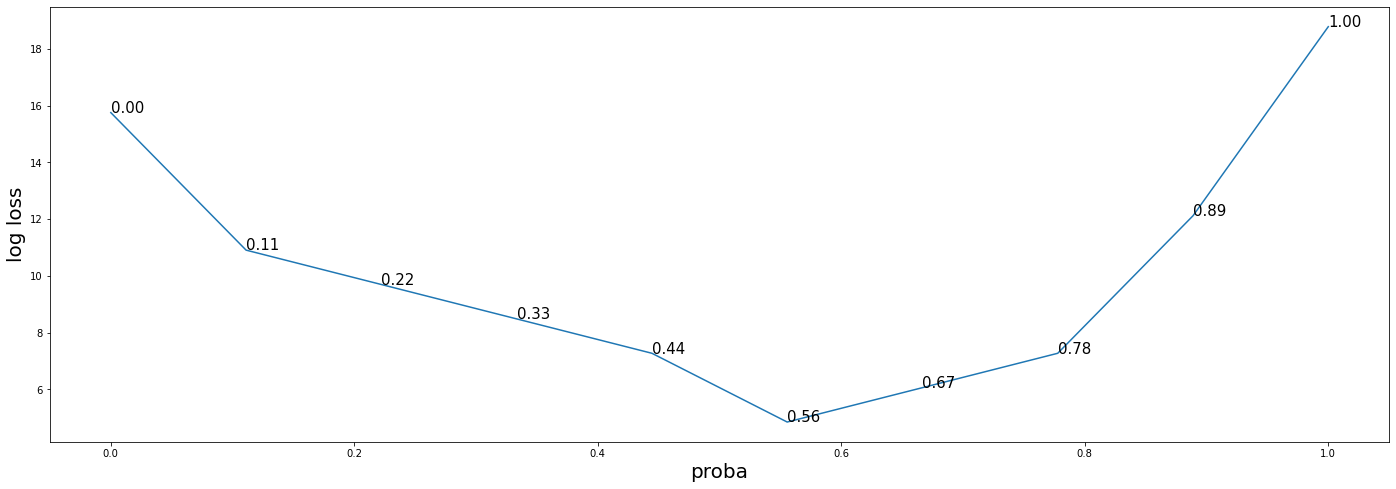

In [671]:
plt.figure(figsize=(24,8))
plt.plot(different_threshold,log_losses)

for i,p in enumerate(different_threshold):
    plt.text(different_threshold[i],log_losses[i],"%0.2f"%(p),fontsize=15)

plt.xlabel("proba",fontsize=20)
plt.ylabel("log loss",fontsize=20)
plt.show()

In [672]:
index = np.array(log_losses).argmin()   # best threshold
different_threshold[index]

0.5555555555555556

 ### `Best threshold probability using with log loss is 0.5555555555555556`

### Use the Performance Metrics and Write the Observations for every Metric
![](https://www.kdnuggets.com/wp-content/uploads/nagesh-metrics-1.png)
 Confusion Matrix
 Precision
 Recall
 Specificity
 Sensitivity
 Accuracy
 F1-score
 True Positive Rate
 False Positive Rate
 Classification Report
 ROC_AUC Curve
 Cohen Kappa Score

### `fit the model ------------------------`

In [673]:
y_pred = np.where(y_pred_proba[:,1]<0.5555555555555556,0,1)
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.8596491228070176


### `Confusion Matrix`

In [674]:
print(f'Confusion matrix =>\n {confusion_matrix(y_test.astype(int),y_pred)}')

Confusion matrix =>
 [[22  4]
 [ 4 27]]


### `Precision = TP / ( TP + FP ) `

In [675]:
from sklearn.metrics import precision_score
print(f'Precision => {precision_score(y_test.astype(int),y_pred)}')

Precision => 0.8709677419354839


### `Recall / Senstivity / True Positive Rate = TP / ( TP + FN )`
- **Effectiveness of a classifier to identify positive labels**

In [676]:
from sklearn.metrics import recall_score
print(f'Recall => {recall_score(y_test.astype(int),y_pred)}')

Recall => 0.8709677419354839


### `Specicificity / True Negative Rate = TN / ( TN + FP )`
- **Effectiveness of a classifier to identify negative labels**

In [677]:
Senstivity = 23 / (23 + 3)
Senstivity

0.8846153846153846

### `Accuracy = ( TP + TN ) / ( TN + FN + TP + FP )`

In [678]:
from sklearn.metrics import accuracy_score
print(f'Accuracy => {accuracy_score(y_test.astype(int),y_pred)}')

Accuracy => 0.8596491228070176


### `F1-score = 2 * Precision * Recall / ( Precision + Recall )`

In [679]:
from sklearn.metrics import f1_score
print(f'F1-score => {f1_score(y_test.astype(int),y_pred)}')

F1-score => 0.8709677419354839


### `False Positive Rate = FP / ( TN + FP )`

In [680]:
false = 3 / ( 3 + 25 )
false

0.10714285714285714

### `Classification Report`

In [681]:
from sklearn.metrics import classification_report
print(f'Classification Report: => \n{classification_report(y_test.astype(int),y_pred)}')

Classification Report: => 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.87      0.87      0.87        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



### `ROC_AUC curve`

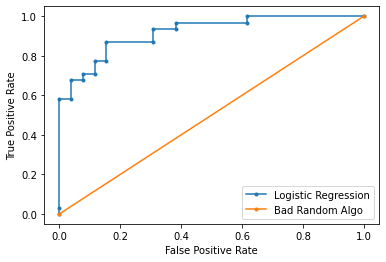

AUC is => 0.9193548387096775


In [682]:
from sklearn.metrics import roc_curve,roc_auc_score

ns_prob = [0 for _ in range(len(y_test))] # bad algo where FPR and TPR are same
ns_fpr,ns_tpr,thresholds_1 = roc_curve(y_test,ns_prob)

lr_prob = y_pred_proba[:,1]   # logistic regression   
lr_fpr,lr_tpr,thesholds_2 = roc_curve(y_test,lr_prob)
lr_auc = roc_auc_score(y_test,lr_prob)

plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')  # plotting
plt.plot(ns_fpr,ns_tpr,marker='.',label='Bad Random Algo')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


print(f'AUC is => {lr_auc}')

### `Kohen Kappa Score`

In [683]:
from sklearn.metrics import cohen_kappa_score
print(f'cohen_kappa_score: => {cohen_kappa_score(y_test.astype(int),y_pred)}')

cohen_kappa_score: => 0.71712158808933


## `End ---------------------------------------------------------`